# DIVIDEND

In [1]:
!pip install forex-python

In [2]:
import yfinance as yf
import pandas as pd
import datetime as dt
from forex_python.converter import CurrencyRates

In [3]:
var = yf.Ticker('AAPL')
var

yfinance.Ticker object <AAPL>

In [4]:
var.dividends

Date
1987-05-11    0.00054
1987-08-10    0.00054
1987-11-17    0.00071
1988-02-12    0.00071
1988-05-16    0.00071
               ...   
2020-05-08    0.20500
2020-08-07    0.20500
2020-11-06    0.20500
2021-02-05    0.20500
2021-05-07    0.22000
Name: Dividends, Length: 71, dtype: float64

In [5]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]
tickers.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.88%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.56%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.88%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.15%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.40%


In [6]:
tickers = tickers.Symbol.to_list()

In [13]:
divs = []
for i in tickers:
    temp = yf.Ticker(i)
    temp.history(period='1y')
    divs.append(temp.dividends)

In [8]:
df = pd.DataFrame(divs, index=tickers)
df

Date,2021-07-01,2021-07-02,2021-07-08,2021-07-19,2021-07-22,2021-08-09,2021-08-12,2021-08-18,2021-08-20,2021-08-23,...,2022-01-19,2022-01-20,2022-02-10,2022-02-15,2022-02-17,2022-02-18,2022-02-24,2022-02-25,2022-02-28,2022-03-01
MMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.48,NaN,...,NaN,NaN,NaN,NaN,1.49,NaN,NaN,NaN,NaN,NaN
AXP,0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAT,NaN,NaN,NaN,1.11,NaN,NaN,NaN,NaN,NaN,NaN,...,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34,NaN,NaN,...,NaN,NaN,NaN,1.42,NaN,NaN,NaN,NaN,NaN,NaN
CSCO,NaN,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns = df.columns.month


In [10]:
df = df.groupby(df.columns, axis=1).sum()
df

Date,1,2,3,7,8,9,10,11,12
MMM,0.0000,1.490,0.0,0.0000,1.480,0.00,0.0000,1.480,0.000
AXP,0.4300,0.000,0.0,0.4300,0.000,0.00,0.4300,0.000,0.000
AMGN,0.0000,0.000,0.0,0.0000,0.000,0.00,0.0000,0.000,0.000
AAPL,0.0000,0.000,0.0,0.0000,0.000,0.00,0.0000,0.000,0.000
BA,0.0000,0.000,0.0,0.0000,0.000,0.00,0.0000,0.000,0.000
CAT,1.1100,0.000,0.0,1.1100,0.000,0.00,1.1100,0.000,0.000
CVX,0.0000,1.420,0.0,0.0000,1.340,0.00,0.0000,1.340,0.000
CSCO,0.0000,0.000,0.0,0.3700,0.000,0.00,0.0000,0.000,0.000
KO,0.0000,0.000,0.0,0.0000,0.000,0.42,0.0000,0.420,0.000
DIS,0.0000,0.000,0.0,0.0000,0.000,0.00,0.0000,0.000,0.000


In [11]:
df.columns = [dt.date(1900,i,1).strftime('%b') for i in df.columns]
df

,Jan,Feb,Mar,Jul,Aug,Sep,Oct,Nov,Dec
MMM,0.0000,1.490,0.0,0.0000,1.480,0.00,0.0000,1.480,0.000
AXP,0.4300,0.000,0.0,0.4300,0.000,0.00,0.4300,0.000,0.000
AMGN,0.0000,0.000,0.0,0.0000,0.000,0.00,0.0000,0.000,0.000
AAPL,0.0000,0.000,0.0,0.0000,0.000,0.00,0.0000,0.000,0.000
BA,0.0000,0.000,0.0,0.0000,0.000,0.00,0.0000,0.000,0.000
CAT,1.1100,0.000,0.0,1.1100,0.000,0.00,1.1100,0.000,0.000
CVX,0.0000,1.420,0.0,0.0000,1.340,0.00,0.0000,1.340,0.000
CSCO,0.0000,0.000,0.0,0.3700,0.000,0.00,0.0000,0.000,0.000
KO,0.0000,0.000,0.0,0.0000,0.000,0.42,0.0000,0.420,0.000
DIS,0.0000,0.000,0.0,0.0000,0.000,0.00,0.0000,0.000,0.000


## Dividend Function:

In [23]:
def usd2eur(amount):
    brutto2netto = 0.85
    return (amount * brutto2netto) * CurrencyRates().get_rates('USD')['EUR']

def get_dividends(tickers):
    divs = []
    for key, value in tickers.items():
        temp = yf.Ticker(key)
        temp.history(period='1y')
        divs.append(temp.dividends * value)
    df = pd.DataFrame(divs, index=tickers)
    df.columns = df.columns.month
    df = df.groupby(df.columns, axis=1).sum()
    df.columns = [dt.date(1900,i,1).strftime('%b') for i in df.columns]
    df = usd2eur(df.select_dtypes(include='float'))
    df['Lot'] = df.index.map(portfolio)
    name = [yf.Ticker(i).info['longName'] for i in portfolio.keys()]
    df['Name'] = name
    df = df[['Name', 'Lot', 'Jan', 'Feb', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
    return df

In [24]:
portfolio = {'NVDA': 2, # NVIDIA
             'STAG': 9, # STAG
             'MCO': 1, # MOODY'S
             'MSFT': 1, # MICROSOFT
             'AGNC': 20, # AGNC INVESTMENT
             'V': 1, # VISA
             'BNTX': 1, # BIONTECH
            }

df = get_dividends(portfolio)
df

,Name,Lot,Jan,Feb,Jun,Jul,Aug,Sep,Oct,Nov,Dec
NVDA,NVIDIA Corporation,2,0.000000,0.000000,0.064321,0.000000,0.064321,0.000000,0.000000,0.000000,0.064321
STAG,"STAG Industrial, Inc.",9,0.882804,0.882804,0.875568,0.875568,0.875568,0.875568,0.875568,0.875568,0.875568
MCO,Moody's Corporation,1,0.000000,0.562807,0.000000,0.000000,0.498487,0.000000,0.000000,0.498487,0.000000
MSFT,Microsoft Corporation,1,0.000000,0.498487,0.000000,0.000000,0.450246,0.000000,0.000000,0.498487,0.000000
AGNC,AGNC Investment Corp.,20,1.929625,1.929625,1.929625,1.929625,1.929625,1.929625,1.929625,1.929625,1.929625
V,Visa Inc.,1,0.000000,0.301504,0.000000,0.000000,0.257283,0.000000,0.000000,0.301504,0.000000
BNTX,BioNTech SE,1,0.000000,0.000000,1.697266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


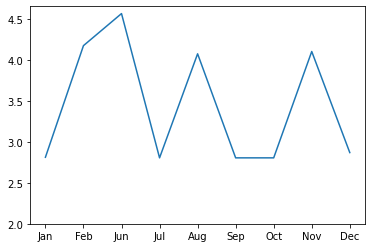

In [35]:
import matplotlib.pyplot as plt
plt.plot(df.select_dtypes(include='float').sum())
plt.ylim(bottom=2);

In [21]:
name = [yf.Ticker(i).info['longName'] for i in portfolio.keys()]
df['Name'] = name


In [22]:
df

,Lot,Jan,Feb,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Name
NVDA,2,0.000000,0.000000,0.064321,0.000000,0.064321,0.000000,0.000000,0.000000,0.064321,NVIDIA Corporation
STAG,9,0.882804,0.882804,0.875568,0.875568,0.875568,0.875568,0.875568,0.875568,0.875568,"STAG Industrial, Inc."
MCO,1,0.000000,0.562807,0.000000,0.000000,0.498487,0.000000,0.000000,0.498487,0.000000,Moody's Corporation
MSFT,1,0.000000,0.498487,0.000000,0.000000,0.450246,0.000000,0.000000,0.498487,0.000000,Microsoft Corporation
AGNC,20,1.929625,1.929625,1.929625,1.929625,1.929625,1.929625,1.929625,1.929625,1.929625,AGNC Investment Corp.
V,1,0.000000,0.301504,0.000000,0.000000,0.257283,0.000000,0.000000,0.301504,0.000000,Visa Inc.
BNTX,1,0.000000,0.000000,1.697266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BioNTech SE


# Install Packages

In [15]:
!pip install pandas --quiet
!pip install pandas_datareader --quiet

In [16]:
import pandas as pd
from pandas_datareader import data

# 1. Stock Market Data

In [17]:
# Get Stockdata (only adjusted close)

def retrieve_stock_data(ticker_symbol):
    df = data.DataReader(ticker_symbol,
                        start='2020-12-1',
                        end='2020-12-31',
                        data_source='yahoo')[['Adj Close']]
    df = df.rename(columns={'Adj Close': f"Adj Close {ticker_symbol}"})
    return df
df = retrieve_stock_data('TSLA')
df.head()

,Adj Close TSLA
Date,
2020-12-01,584.760010
2020-12-02,568.820007
2020-12-03,593.380005
2020-12-04,599.039978
2020-12-07,641.760010


# 2. Install xlwings

In [18]:
!pip install xlwings --upgrade --quiet

In [19]:
import xlwings as xw

# 3. Quick & Easy Way

In [20]:
# View Dataframe in excel:
#xw.view(df)